In [133]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Dataset

In [134]:
from pathlib import Path

class config:
    IMG_PATH = "/kaggle/input/the-car-connection-picture-dataset"
    ORIGINAL_PROJECT_PATH ="/kaggle/input/train-dataset/train"
    ORIGINAL_PROJECT_LABELS = "/kaggle/input/train-dataset/train.csv"

Loading the data in a dataset

In [135]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.io import read_image
from torchvision import transforms
from torch.utils.data import Dataset

class CarDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.transform_img = transforms.Compose([transforms.ToTensor()])
        self.files = []
        self._get_files()

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_path = Path(self.img_dir) / Path(self.files[idx])
        image = read_image(img_path.as_posix())
        if self.transform:
            image = self.transform(image)
        return image
    
    def _get_files(self):
        p = Path(self.img_dir).glob('**/*')
        self.files = sorted([x.name for x in p if x.is_file()])

        
cars_dataset = CarDataset(config.IMG_PATH)

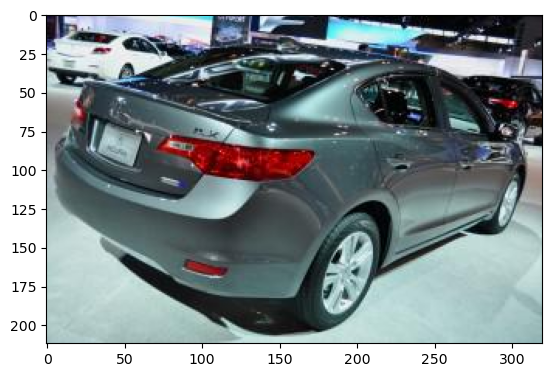

In [136]:
fig, ax = plt.subplots()
ax.imshow(np.transpose(cars_dataset[0],(1,2,0)))

### Checking the dataset

1. The size of all the images

In [137]:
cars_dataset.files[count]

'smart_fortwo_2019_28_15_800_nan_nan_74_61_106_nan_RWD_2_2_Convertible_uRF.jpg'

In [138]:
import pandas as pd
from tqdm import tqdm

shapes = []

# See the size of all the pictures
for count, im in tqdm(enumerate(cars_dataset)):
    rgb, h, w = im.shape
    shapes.append([cars_dataset.files[count],rgb, h , w])
    
shapes_df = pd.DataFrame(shapes,columns = ["path","RGB","h","w"])
shapes_df.head()

64467it [01:45, 609.98it/s]


,path,RGB,h,w
0,Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...,3,212,320
1,Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...,3,240,320
2,Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...,3,240,320
3,Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...,3,240,320
4,Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...,3,240,320


In [139]:
print("Unique values for the Heights:",shapes_df["h"].unique())
print("Unique values for the Width:",shapes_df["w"].unique())

Unique values for the Heights: [212 240 213 202 205 224 214 207 200 211 209 234 241 175 203 480 201 160
 223 181 206 233 239 182 194 216 148 186 164 210 220 190 185 169 196 208
 187 193 180 204 177 243 192 154 235 221 219 260 231 468 215 599 188 230
 228 149 197 217 253 218 198 232 479 179 189 176 183 195 178 167 156 191
 199 226 452 158 163 170 134 247 469 157 184 152 225 174 161 155 172 320
 168 173 504 141 150 245 438 426 236 229 162 227 222 171 387 449 166 276
 238 385 281 147 153 254 246 463 263 248 297 306 375 308 277 237 299 310
 257 261 165 251 406 119 132 317 159 250 135 274 430 323 120 272 137 389
 501 144 106 322 249 301 473 483 488 331 344 267 442 256 121 139 151 312
 444 481 298 592 140 292 138 128 278 288 275 382 270 100 115 268 146 273
 133 271 286 340 724 145 295 258 425 123 129 289 446 266 252 477 364 458
 255 264 345 409 269 439 116 265 330 113 110 334 126 309 142 259 136 130
 348 244 336 561 427 378 362 302 402 359 104 125 105 396 413 111 392 540
 539 491 131 397 499

Widths are unique and not the heights

Heights: 240    40388
213    14014
212     1677
239      613
160      572
       ...  
330        1
409        1
345        1
458        1
474        1
Name: h, Length: 304, dtype: int64


Text(0.5, 1.0, 'Percentage of Heights')

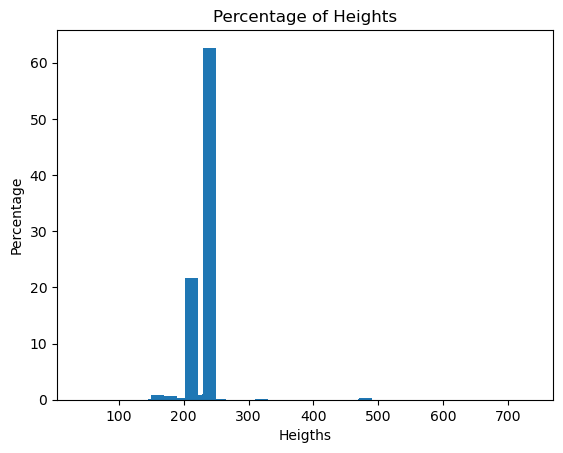

In [140]:
print("Heights:", shapes_df["h"].value_counts())

fig, ax = plt.subplots()
labels = shapes_df["h"].value_counts().index
values = (shapes_df["h"].value_counts() / len(shapes_df["h"])) *100
ax.bar(labels, values,20)
ax.set_xlabel("Heigths")
ax.set_ylabel("Percentage")
plt.title("Percentage of Heights")

**14000 data is enought for training a model, we will only keep the 213x320 datas**

In [141]:
final_df = shapes_df["path"].loc[shapes_df["h"] == 213]
final_df

9        Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...
11       Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...
12       Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...
13       Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...
15       Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...
                               ...                        
64443    smart_fortwo_2019_28_15_800_nan_nan_74_61_106_...
64448    smart_fortwo_2019_28_15_800_nan_nan_74_61_106_...
64451    smart_fortwo_2019_28_15_800_nan_nan_74_61_106_...
64456    smart_fortwo_2019_28_15_800_nan_nan_74_61_106_...
64462    smart_fortwo_2019_28_15_800_nan_nan_74_61_106_...
Name: path, Length: 14014, dtype: object

### New dataset

In [142]:
cars_dataset.files = final_df.values

In [143]:
len(cars_dataset)

14014

# Second part: labeling non car data

1. Importing the images

In [144]:
df_original_dataset_labels["bounding_boxes"].isna().sum()

182

In [145]:
df_original_dataset_labels = pd.read_csv(config.ORIGINAL_PROJECT_LABELS)
empty_images = df_original_dataset_labels["bounding_boxes"].isna().sum()
print("Number of images without any car:",empty_images)

df_empty_images = df_original_dataset_labels.loc[df_original_dataset_labels["bounding_boxes"].isna()]
print(len(df_empty_images))

Number of images without any car: 182
182


# Hog

In [146]:
#creating hog features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)

NameError: name 'hog' is not defined